In [32]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

### Data

In [39]:
train_data_dir = "chest_xray/train"
test_data_dir = "chest_xray/test"
val_data_dir = "chest_xray/val"

idg = ImageDataGenerator(rescale=1./255)

train_generator = idg.flow_from_directory(train_data_dir,
                                          target_size =(128, 128),
                                          batch_size = 32,
                                          class_mode = 'binary')
test_generator = idg.flow_from_directory(test_data_dir,
                                        target_size =(128,128),
                                        batch_size = 32,
                                        class_mode = 'binary')
valid_generator = idg.flow_from_directory(val_data_dir,
                                         target_size = (128, 128),
                                         batch_size = 32,
                                         class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


### Model

In [40]:
model = Sequential()

model.add(Conv2D(32,3, activation = 'relu', input_shape = (128, 128, 3)))

model.add(MaxPool2D(pool_size = 2))

model.add(Conv2D(32, 3, activation = 'relu'))

model.add(MaxPool2D(pool_size = 3))

model.add(Flatten())

model.add(Dense(100, activation = 'relu'))

model.add(Dense(1, activation='sigmoid'))

In [41]:
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 20, 20, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               1280100   
_________________________________________________________________
dense_8 (Dense)              (None, 1)               

### Evaluation

In [42]:
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [43]:
callback = EarlyStopping(monitor='val_loss', patience=5, min_delta=3)

In [44]:
hist=model.fit(train_generator, validation_data=valid_generator, epochs=3, batch_size=32, callbacks=callback)

Epoch 1/3
163/163 [==============================] - 67s 405ms/step - loss: 0.3707 - accuracy: 0.8293 - val_loss: 0.8542 - val_accuracy: 0.6250
Epoch 2/3
163/163 [==============================] - 62s 381ms/step - loss: 0.1256 - accuracy: 0.9510 - val_loss: 0.3792 - val_accuracy: 0.8125
Epoch 3/3
163/163 [==============================] - 63s 383ms/step - loss: 0.0984 - accuracy: 0.9637 - val_loss: 0.1916 - val_accuracy: 0.8750


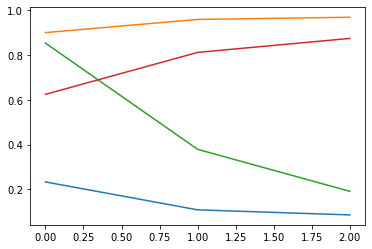

In [45]:
plt.plot(pd.DataFrame(hist.history))

In [46]:
model.evaluate(test_generator)

20/20 [==============================] - 6s 307ms/step - loss: 1.1239 - accuracy: 0.7420


[1.1238809823989868, 0.7419871687889099]

### Model Tuning